In [41]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [42]:
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')

In [43]:
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('sad')
    elif w[0] == 'n':
        emotion.append('neutral')
    elif w[0:2] == 'su':
        emotion.append('surprised')
    elif w[0] == 'f':
        emotion.append('fear')
    elif w[0] == 'd':
        emotion.append('disgust')
    elif w[0] == 'h':
        emotion.append('happy')
    elif w[0] =='a':
        emotion.append('anger')
print(len(emotion))

480


In [44]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

,Emotions,Path,folder
0,sad,JK_sa01.wav,savee_dataset/
1,sad,JK_sa15.wav,savee_dataset/
2,neutral,DC_n13.wav,savee_dataset/
3,surprised,DC_su09.wav,savee_dataset/
4,neutral,DC_n07.wav,savee_dataset/
5,neutral,JK_n20.wav,savee_dataset/
6,neutral,JK_n08.wav,savee_dataset/
7,sad,JE_sa08.wav,savee_dataset/
8,fear,JK_f15.wav,savee_dataset/
9,fear,JK_f01.wav,savee_dataset/


In [45]:
savee_df = savee_df[savee_df['Emotions'] != 'disgust']
#savee_df = savee_df[savee_df['Emotions'] != 'surprised']
savee_df = savee_df.reset_index(drop=True)

In [46]:
wav = '1039_IEO_SAD_MD.wav'
w = wav.split('_')
print(w[2])

SAD


In [47]:
emotion = []
for wav in crema_d:
    w = wav.split('_')
    if w[2] == 'SAD':
        emotion.append('sad')
    elif w[2] == 'NEU':
        emotion.append('neutral')
    elif w[2] == 'SUR':
        emotion.append('surprised')
    elif w[2] == 'FEA':
        emotion.append('fear')
    elif w[2] == 'DIS':
        emotion.append('disgust')
    elif w[2] == 'HAP':
        emotion.append('happy')
    elif w[2] =='ANG':
        emotion.append('anger')
print(len(emotion))

7442


In [48]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [49]:
crema_d_df = crema_d_df[crema_d_df['Emotions'] != 'disgust']
#crema_d_df = crema_d_df[crema_d_df['Emotions'] != 'surprised']
crema_d_df = crema_d_df.reset_index(drop=True)

In [50]:
ravdess.remove('.DS_Store')

In [51]:
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if wav[7:8] == '4':
            emotion.append('sad')
        elif wav[7:8] == '1':
            emotion.append('neutral')
        elif wav[7:8] == '8':
            emotion.append('surprised')
        elif wav[7:8] == '6':
            emotion.append('fear')
        elif wav[7:8] == '7':
            emotion.append('disgust')
        elif wav[7:8] == '3':
            emotion.append('happy')
        elif wav[7:8] =='5':
            emotion.append('anger')
        elif wav[7:8] =='2':
            emotion.append('neutral')
print(len(emotion))

1440


In [52]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [53]:
ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'disgust']
#ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'surprised']
ravdess_df = ravdess_df.reset_index(drop=True)

In [54]:
data = pd.concat([savee_df, crema_d_df, ravdess_df], axis=0)
data = data.reset_index(drop=True)

In [55]:
data.head()

,Emotions,Path,folder
0,sad,JK_sa01.wav,savee_dataset/
1,sad,JK_sa15.wav,savee_dataset/
2,neutral,DC_n13.wav,savee_dataset/
3,surprised,DC_su09.wav,savee_dataset/
4,neutral,DC_n07.wav,savee_dataset/


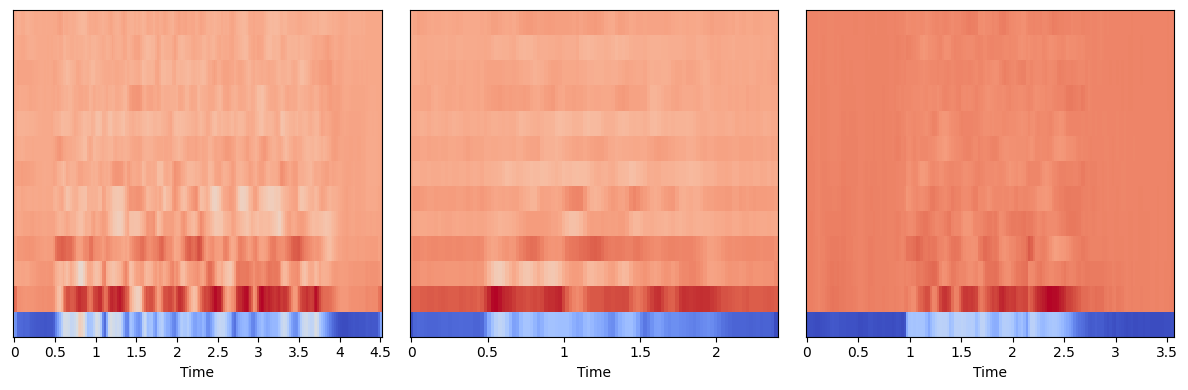

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sad_examples = ['savee_dataset/JK_sa01.wav', 'crema_d_dataset/1042_ITS_SAD_XX.wav',
                'ravdess_dataset/Actor_13/03-01-04-01-01-01-13.wav']

for i, sad in enumerate(sad_examples):
    file = os.path.join(sad)
    y, sr = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    ax = axes.flatten()[i]
    librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    
plt.tight_layout()
plt.show()

In [57]:
# The blue bit shows negative decibels, silence is 0 therefore these sounds are not of the voice

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


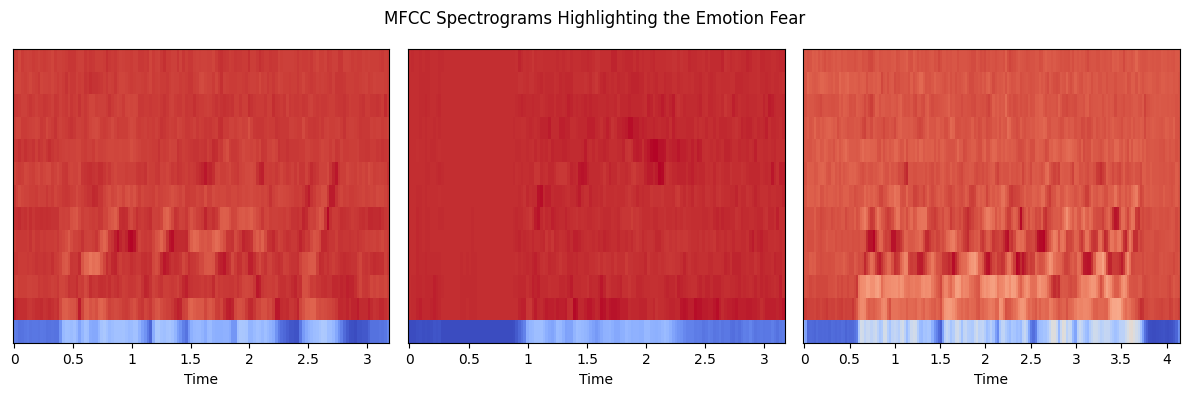

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sad_examples = ['savee_dataset/KL_f07.wav',
               'ravdess_dataset/Actor_09/03-01-06-01-01-01-09.wav',
                'savee_dataset/JK_f01.wav']

for i, sad in enumerate(sad_examples):
    file = os.path.join(sad)
    y, sr = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, fmax=400, fmin=90)
    ax = axes.flatten()[i]
    librosa.display.specshow(mfccs, x_axis='time', ax=ax)

plt.suptitle('MFCC Spectrograms Highlighting the Emotion Fear')
plt.tight_layout()
plt.show()

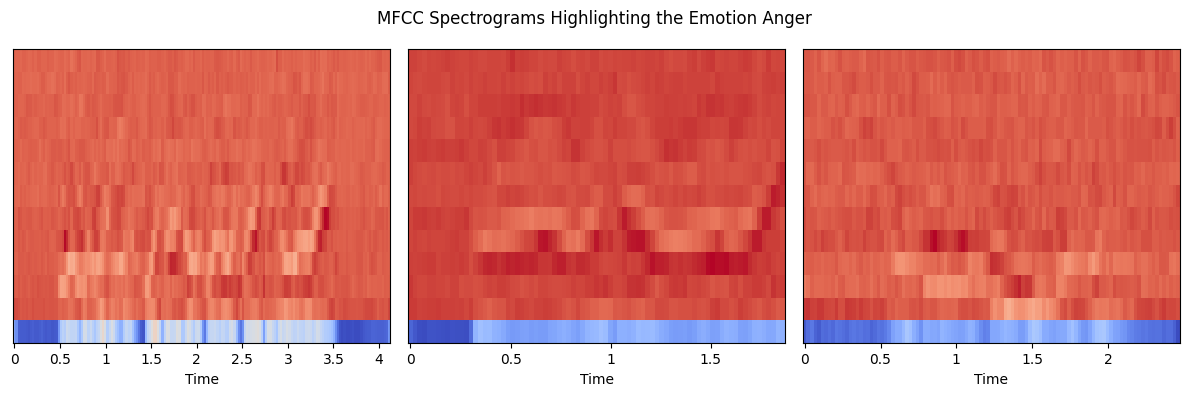

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sd_examples = ['savee_dataset/JK_a01.wav', 'savee_dataset/JK_a15.wav', 
                'savee_dataset/KL_a07.wav', 'crema_d_dataset/1042_ITS_ANG_XX.wav',
               'crema_d_dataset/1057_ITS_ANG_XX.wav', 'crema_d_dataset/1009_IWL_ANG_XX.wav',
               'ravdess_dataset/Actor_09/03-01-05-01-01-01-09.wav',
                'ravdess_dataset/Actor_13/03-01-05-02-02-01-13.wav',
                'ravdess_dataset/Actor_13/03-01-05-01-01-01-13.wav']

sad_examples = ['savee_dataset/JK_a01.wav', 'savee_dataset/KL_a07.wav',
               'crema_d_dataset/1057_ITS_ANG_XX.wav']

for i, sad in enumerate(sad_examples):
    file = os.path.join(sad)
    y, sr = librosa.load(file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, fmax=400, fmin=90)
    ax = axes.flatten()[i]
    librosa.display.specshow(mfccs, x_axis='time', ax=ax)

plt.suptitle('MFCC Spectrograms Highlighting the Emotion Anger')
plt.tight_layout()
plt.show()

In [60]:
count = 0
for i in range(len(data)):
    if data.loc[i, 'Emotions'] == 'anger':
        count+=1

print(count)

1523


In [61]:
count = 0
for i in range(len(data)):
    if data.loc[i, 'Emotions'] == 'disgust':
        count+=1

print(count)

0


In [22]:
mfcc_spec=[]
def turning_mfcc(data):
    try:
        for _, row in data.iterrows():
            file = os.path.join(row['folder'], row['Path'])
            y, sr = librosa.load(file)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, lifter =30)
            #mfccs = np.abs(mfccs)
            #mfccs = np.log1p(mfccs)
            mfccs = cv2.resize(mfccs, (200,80), interpolation=cv2.INTER_AREA)
            mfcc_spec.append(mfccs)
    except Exception as e:
            print(f"Error processing file {wav}: {e}")

turning_mfcc(data)

In [23]:
data.head()

,Emotions,Path,folder
0,sad,JK_sa01.wav,savee_dataset/
1,sad,JK_sa15.wav,savee_dataset/
2,neutral,DC_n13.wav,savee_dataset/
3,surprised,DC_su09.wav,savee_dataset/
4,neutral,DC_n07.wav,savee_dataset/


In [62]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [63]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

       
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result


In [64]:
data.Path

0                             JK_sa01.wav
1                             JK_sa15.wav
2                              DC_n13.wav
3                             DC_su09.wav
4                              DC_n07.wav
                      ...                
7834    Actor_08/03-01-03-02-02-02-08.wav
7835    Actor_08/03-01-03-01-01-02-08.wav
7836    Actor_08/03-01-02-02-01-01-08.wav
7837    Actor_08/03-01-02-01-02-01-08.wav
7838    Actor_08/03-01-01-01-02-02-08.wav
Name: Path, Length: 7839, dtype: object

In [112]:
path = np.array(data.folder+data.Path)[1]
dat, sample_rate = librosa.load(path)

In [65]:
sample_rate=22050

In [66]:
data.head()

,Emotions,Path,folder
0,sad,JK_sa01.wav,savee_dataset/
1,sad,JK_sa15.wav,savee_dataset/
2,neutral,DC_n13.wav,savee_dataset/
3,surprised,DC_su09.wav,savee_dataset/
4,neutral,DC_n07.wav,savee_dataset/


In [67]:
print(data.folder[0]+data.Path[0])

savee_dataset/JK_sa01.wav


In [68]:
X, Y = [], []
for path, emotion in zip(data.folder+data.Path, data.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [69]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.022190,0.574993,0.484198,0.461432,0.481684,0.555923,0.594388,0.527182,0.487478,0.539226,...,0.000016,3.954718e-06,5.458689e-07,2.481721e-07,2.466266e-07,2.579973e-07,2.822846e-07,2.924179e-07,2.166202e-07,sad
1,0.078157,0.683251,0.643475,0.637920,0.653007,0.701484,0.685555,0.603608,0.565823,0.611576,...,0.029923,3.065829e-02,2.946218e-02,2.775881e-02,2.863030e-02,2.835478e-02,3.000160e-02,3.011395e-02,2.773558e-02,sad
2,0.028671,0.502483,0.539146,0.473560,0.474009,0.487270,0.553858,0.620381,0.512380,0.451303,...,0.000022,6.947957e-06,1.558525e-06,3.756164e-07,1.377267e-07,1.352921e-07,1.196581e-07,7.649706e-08,2.547649e-08,sad
3,0.018410,0.637207,0.518334,0.480570,0.519853,0.539421,0.572215,0.580892,0.549685,0.527997,...,0.000002,6.130602e-07,3.015664e-07,2.644340e-07,2.495124e-07,2.373654e-07,2.325593e-07,1.993910e-07,1.065614e-07,sad
4,0.021792,0.680971,0.581453,0.554334,0.594256,0.602462,0.617146,0.591930,0.556996,0.543690,...,0.001436,1.400021e-03,1.408580e-03,1.363140e-03,1.406230e-03,1.389586e-03,1.393404e-03,1.404046e-03,1.415787e-03,sad


In [70]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

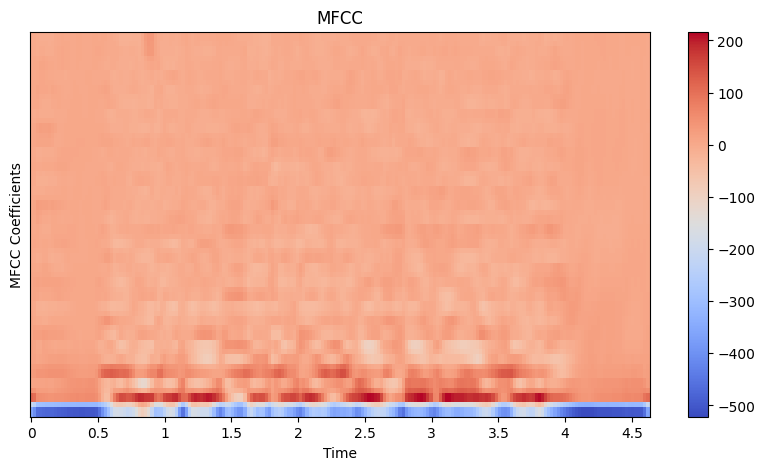

In [144]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc_spec[0], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

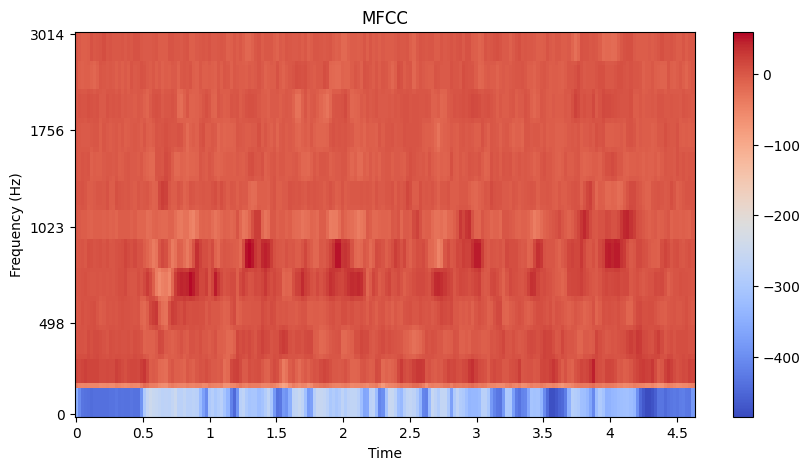

In [92]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Assuming mfcc_spec is already calculated

# Compute the Mel filter bank frequencies corresponding to the MFCC coefficients
n_mfcc = mfcc_spec[0].shape[0]  # Number of MFCC coefficients
sr = 22050  # Example sampling rate, replace with your actual value
n_mels = 128  # Default number of Mel bands used in MFCC computation

# Get Mel filter bank center frequencies
mel_frequencies = librosa.mel_frequencies(n_mels=n_mels, fmin=0, fmax=sr // 2)
mfcc_frequencies = mel_frequencies[:n_mfcc]  # Use only the first n_mfcc frequencies

# Plot MFCC spectrogram with frequencies on the y-axis
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc_spec[1], x_axis='time', y_axis=None)
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')

# Set custom y-axis labels
num_ticks = 5  # Change this to control the number of ticks
tick_indices = np.linspace(0, len(mfcc_frequencies) - 1, num_ticks).astype(int)
tick_labels = np.round(mfcc_frequencies[tick_indices]).astype(int)

plt.yticks(tick_indices, labels=tick_labels)
plt.ylabel('Frequency (Hz)')

plt.show()


In [87]:
#X = np.array(mfcc_spec)
#y= data.loc[:, 'Emotions']

from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#le.fit(['sad', 'fear', 'anger', 'neutral', 'happy', 'surprised'])#,'calm', 'surprised', 'disgust'])
#y_transformed=le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [88]:
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.transform(y_val)
y_test=label_encoder.transform(y_test)
print(y_train)

[0 3 3 ... 1 1 4]


In [73]:
y_transformed[0:10]

array([4, 4, 3, 5, 3, 3, 3, 4, 1, 1])

In [74]:
y[0:10]

array([-0.00280499, -0.00300211, -0.0030438 , -0.00369205, -0.00323179,
       -0.00334121, -0.00454309, -0.00369916, -0.00245429, -0.00370963],
      dtype=float32)

In [75]:
y_train.max()

np.int64(5)

In [76]:
y_test.max()

np.int64(5)

In [77]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(14110, 162)
(4703, 162)
(4704, 162)


In [89]:
X_reshaped = X_train
X_val_reshaped = X_val
X_test_reshaped = X_test

In [81]:
X_reshaped.shape

(14110, 162)

In [79]:
X_reshaped = X_train.reshape(4703, 80*200)
X_val_reshaped = X_val.reshape(1568, 80*200)
X_test_reshaped = X_test.reshape(1568, 80*200)

ValueError: cannot reshape array of size 2285820 into shape (4703,16000)

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_reshaped)
X_reshaped = scaler.transform(X_reshaped)
X_val_reshaped = scaler.transform(X_val_reshaped)
X_test_reshaped = scaler.transform(X_test_reshaped)

In [83]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(14110, 162)
(4703, 162)
(4704, 162)


In [84]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_reshaped = pca.fit_transform(X_reshaped)
X_val_reshaped = pca.transform(X_val_reshaped)
X_test_reshaped = pca.transform(X_test_reshaped)


In [85]:
X_reshaped.shape

(14110, 40)

0.66

In [91]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_reshaped, y_train)
y_pred_xgb = xgb.predict(X_test_reshaped)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.66


In [150]:
k_list = []
scores_list = [] 
 
for k in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
        knn.fit(X_reshaped,y_train)
        y_pred=knn.predict(np.array(X_test_reshaped)) 
        k_list.append(k)
        accuracy = metrics.accuracy_score(y_test,y_pred)
        print(k, 'accuracy',accuracy)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 accuracy 0.44409013605442177
2 accuracy 0.44409013605442177
3 accuracy 0.45556972789115646
4 accuracy 0.45897108843537415
5 accuracy 0.45982142857142855
6 accuracy 0.4655612244897959
7 accuracy 0.47087585034013607
8 accuracy 0.4815051020408163
9 accuracy 0.4789540816326531
10 accuracy 0.4844812925170068
11 accuracy 0.4804421768707483
12 accuracy 0.48320578231292516
13 accuracy 0.48660714285714285
14 accuracy 0.4897959183673469
15 accuracy 0.48681972789115646
16 accuracy 0.48533163265306123
17 accuracy 0.48299319727891155
18 accuracy 0.48554421768707484
19 accuracy 0.4815051020408163


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_reshaped, y_train)
y_pred = rfc.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))

0.5284863945578231


In [311]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [339]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200,80, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    #Dense(256, activation='relu'),
    #BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv2d_9" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 40, 1)

In [337]:
%load_ext tensorboard

import datetime
import tensorflow as tf
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(X_reshaped,y_train,
                   epochs=5,
                   validation_data=(X_val,y_val),
                   callbacks=cp)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=True
  • mask=None

In [330]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6599), started 3:35:54 ago. (Use '!kill 6599' to kill it.)

In [331]:
model.evaluate(X_test,y_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4766 - loss: 5.2143


[5.19608736038208, 0.4649234712123871]

In [332]:
predicted_emotion = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [333]:
y_test[0:20]

array([0, 4, 2, 2, 3, 4, 0, 4, 3, 1, 4, 0, 4, 4, 0, 0, 5, 4, 4, 2])

In [334]:
y_test.max()

np.int64(5)

In [335]:
predicted_classes = np.argmax(predicted_emotion, axis=1)
predicted_classes[0:20]

array([0, 3, 0, 2, 3, 3, 0, 3, 3, 2, 3, 0, 1, 1, 0, 2, 2, 3, 3, 2])

In [336]:
from sklearn.metrics import confusion_matrix
#0-anger, 1-fear, 2-happy, 3-neutral, 4-sad, 5-surprised
print(confusion_matrix(y_test, predicted_classes))

[[201   7  46  41   1   0]
 [ 36  72  67  97  37   2]
 [ 61  22 110  85   4   6]
 [  9   6  21 247  12   0]
 [  9  25  19 197  79   0]
 [  5   3  13   7   1  20]]


In [132]:
from sklearn import svm

model=svm.SVC()
model.fit(X_reshaped,y_train)

SVC()

In [133]:
y_pred = model.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))

0.5008503401360545


In [135]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[554  26 226  76  22  14]
 [ 82 198 137 190 274  13]
 [134  95 387 240  76  17]
 [  8  38  65 590 151   4]
 [  3  43  36 279 571  10]
 [  8  12  13  56   0  56]]
